In [1]:
import os

import pandas
import numpy
import matplotlib.pyplot as plt

from ProblemInstance import ProblemInstance
from baseline_intra import bl_intra_1
from baseline_request import bl_req_FCFS
from our_approach import leader_follower

In [2]:
def get_xb_utilization(problem, plan):
    return problem.utilization_xb(*problem.get_pc_packages_from_plan(*plan))
def get_buf_utilization(problem, plan):
    return problem.utilization_buf(*problem.get_pc_packages_from_plan(*plan))

def bar_utilization(u, t, ax, xlim, ylim):
    # print(u)
    x = []
    accum = 0
    for time in t:
        x.append(accum)
        accum += time
    print(x)
    ax.bar(x, u, t, align="edge")
    ax.set_xlim(*xlim)
    ax.set_ylim(*ylim)
    ax.get_xaxis().set_visible(False)
    
def plot_utilization(utilization, time, ax, xlim, ylim, color, label):
    x = []
    y = []
    accum = 0
    for t, u in zip(time, utilization):
        x.append(accum)
        y.append(u*100)
        accum += t
        x.append(accum)
        y.append(u*100)
    x.append(accum)
    y.append(0)
    ax.plot(x, y, color=color, label=label)
    ax.fill_between(x, y, 0, facecolor=color, alpha=0.1)
    ax.set_xlim(*xlim)
    ax.set_ylim(*ylim)
    ax.spines["right"].set_visible(False)
    ax.spines["top"].set_visible(False)
    ax.plot(1, 0, ">k", transform=ax.get_yaxis_transform(), clip_on=False)  # draw arrow
    ax.plot(0, 1, "^k", transform=ax.get_xaxis_transform(), clip_on=False)  # draw arrow
    
    ax.set_yticks([0, 25, 50, 75, 100], labels=["0%", "", "50%", "", "100%"], fontsize=15)
    ax.grid()

In [3]:
fontsize = 15
neurosim_dir = "NetStructure"  # directory store network structure description file following NeuroSim
summary_file = "NeuroSIMOut/summary.csv"  # simulation result get from NeuroSim

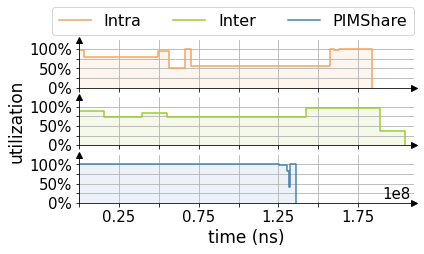

In [4]:
xlim = (0, 2.1e8)
ylim = (0, 125)
seed = 10
n_req = 50000

p = [2.82429036e-04, 2.84984955e-04, 4.24295402e-01, 6.32636469e-02, 6.48997757e-02, 6.37997795e-02, 6.48997757e-02, 1.98032806e-06,
     6.20383998e-03, 4.99274052e-04, 2.63109153e-01, 3.76999064e-02, 1.04423292e-02, 8.72686318e-06, 6.40827886e-05, 1.38228265e-05,
     8.39031629e-05, 1.47187441e-04]
multi_model_problem = ProblemInstance(neurosim_dir)
multi_model_problem.read_nn_profile(summary_file)
multi_model_problem.get_random_requests_unequal(n_req, seed=seed, p = p)
multi_model_problem.append_request()

fig, axes = plt.subplots(3, 1, sharex=True, sharey=True, figsize=(6,3))

plan_intra = bl_intra_1(multi_model_problem)
plot_utilization(*(get_xb_utilization(multi_model_problem, plan_intra)), axes[0], xlim, ylim, color="sandybrown", label="Intra")

package_inter = bl_req_FCFS(multi_model_problem) 
ax_inter = plt.subplot(3,1,2)
plot_utilization(*multi_model_problem.utilization_xb(*package_inter), axes[1], xlim, ylim, color="yellowgreen", label="Inter")
plt.ylabel("utilization", fontsize=fontsize+2)

plan_our = leader_follower(multi_model_problem)
ax_our = plt.subplot(3,1,3)
plot_utilization(*(get_xb_utilization(multi_model_problem, plan_our)), axes[2], xlim, ylim, color="steelblue", label="PIMShare")

x_ticks = numpy.arange(8) * 0.25 * 1e8
plt.xticks(x_ticks, ["" if i%2==0 else str(x/1e8) for i, x in enumerate(x_ticks)],fontsize=fontsize)
plt.xlabel("time (ns)", fontsize=fontsize+2)
plt.text(1.9e8, 10, "1e8", fontsize=fontsize)

handlers = []
labels = []
h, l = fig.axes[0].get_legend_handles_labels()
handlers.append(h[0])
labels.append(l[0])
h, l = fig.axes[1].get_legend_handles_labels()
handlers.append(h[0])
labels.append(l[0])
h, l = fig.axes[2].get_legend_handles_labels()
handlers.append(h[0])
labels.append(l[0])
plt.legend(handlers, labels, ncol=3, loc=(-0.08,3.5), fontsize=fontsize+1)

plt.show()